#### Preparación del entorno y carga de módulos

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygal
import seaborn as sns
from IPython.display import SVG

#### Carga de datos

In [242]:
datos = pd.read_csv("covid19-provincias-spain_consolidated.csv")
datos

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,hospitalized_accumulated,...,daily_deaths_avg7,daily_deaths_avg7_hosp_eus,deaths_last_week,num_casos_avg7,num_casos_prueba_pcr_avg7,num_casos2_avg7,ia14,source_name,source,comments
0,2020-01-01,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48570,2022-09-20,Zaragoza,50,Aragón,NaN,NaN,NaN,NaN,55.0,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,aragon.es,https://www.aragon.es/documents/20127/38742837...,NaN
48571,2022-09-21,"Coruña, A",15,Galicia,NaN,NaN,NaN,NaN,53.0,NaN,...,0.0,NaN,0,NaN,NaN,NaN,55.1,NaN,NaN,NaN
48572,2022-09-21,Lugo,27,Galicia,NaN,NaN,NaN,NaN,12.0,NaN,...,0.0,NaN,0,NaN,NaN,NaN,70.4,NaN,NaN,NaN
48573,2022-09-21,Ourense,32,Galicia,NaN,NaN,NaN,NaN,19.0,NaN,...,0.0,NaN,0,NaN,NaN,NaN,98.5,NaN,NaN,NaN


#### Preparacion de los datos

In [244]:
# Procedo a quedarme unicamente con las columnas que voy a utilizar 
# en la creacion de los datos
preparados = datos[["date","province","ccaa","num_casos","num_def","poblacion","hospitalized"]]

# Sustituimos los NaN por 0 en num_casos y hospitalizados como dice el enunciado
preparados = preparados.fillna({"num_casos":0,"hospitalized":0})
preparados

,date,province,ccaa,num_casos,num_def,poblacion,hospitalized
0,2020-01-01,Albacete,Castilla - La Mancha,0.0,0.0,388167,0.0
1,2020-01-01,Alicante/Alacant,Comunitat Valenciana,1.0,0.0,1858683,0.0
2,2020-01-01,Almería,Andalucía,0.0,0.0,716820,0.0
3,2020-01-01,Araba/Álava,País Vasco,0.0,0.0,331549,0.0
4,2020-01-01,Asturias,"Asturias, Principado de",0.0,0.0,1022800,0.0
...,...,...,...,...,...,...,...
48570,2022-09-20,Zaragoza,Aragón,0.0,NaN,964693,55.0
48571,2022-09-21,"Coruña, A",Galicia,0.0,NaN,1119596,53.0
48572,2022-09-21,Lugo,Galicia,0.0,NaN,329587,12.0
48573,2022-09-21,Ourense,Galicia,0.0,NaN,307651,19.0


In [245]:
# Vemos que algunas comunidades autónomas como Madrid, Navarra, La Rioja etc están mal puestos
# reemplazamos esos valores por el nombre bien puesto
preparados = preparados.replace({"Madrid, Comunidad de": "Comunidad de Madrid","Navarra, Comunidad Foral de":"Comunidad Foral de Navarra","Rioja, La": "La Rioja","Murcia, Región de": "Región de Murcia",
                                 "Balears, Illes":"Islas Baleares", "Asturias, Principado de": "Principado de Asturias","Comunitat Valenciana":"Comunidad Valenciana"})

# Tambien los NaN por 0
#preparados = preparados.fillna(0)
preparados.head(25)

,date,province,ccaa,num_casos,num_def,poblacion,hospitalized
0,2020-01-01,Albacete,Castilla - La Mancha,0.0,0.0,388167,0.0
1,2020-01-01,Alicante/Alacant,Comunidad Valenciana,1.0,0.0,1858683,0.0
2,2020-01-01,Almería,Andalucía,0.0,0.0,716820,0.0
3,2020-01-01,Araba/Álava,País Vasco,0.0,0.0,331549,0.0
4,2020-01-01,Asturias,Principado de Asturias,0.0,0.0,1022800,0.0
5,2020-01-01,Ávila,Castilla y León,0.0,0.0,157640,0.0
6,2020-01-01,Badajoz,Extremadura,0.0,0.0,673559,0.0
7,2020-01-01,Islas Baleares,Islas Baleares,0.0,0.0,1149460,0.0
8,2020-01-01,Barcelona,Cataluña,2.0,0.0,5664579,0.0
9,2020-01-01,Bizkaia,País Vasco,0.0,0.0,1152651,0.0


## Gráfico que muestre la distribución que sigue una variable - MATPLOTLIB

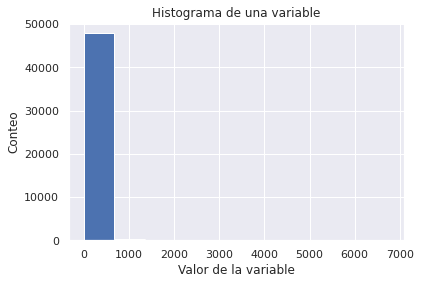

In [246]:
# Para ello hago un histograma

plt.hist(preparados["num_casos"])
plt.title('Histograma de una variable')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')
plt.show()

## Gráfico que muestra la evolución total - MATPLOTLIB

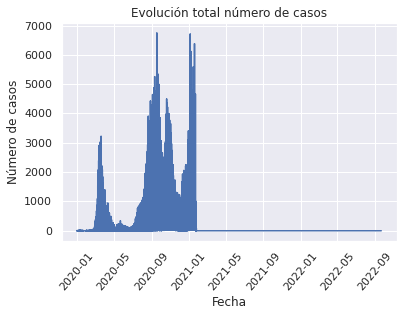

In [247]:
# Número de casos por fecha
x = pd.to_datetime(preparados["date"])
y = preparados["num_casos"]
plt.plot(x,y)
plt.title("Evolución total número de casos")
plt.ylabel("Número de casos")
plt.xlabel("Fecha")
plt.xticks(rotation=50)
plt.show()

## Gráfico que muestre la evolución por comunidades autónomas

## Gráfico que muestre los casos por provincias - MATPLOTLIB

In [248]:
# Modifico el dataframe
# Primero agrupo por provincias haciendo sum()
agrupar = preparados.groupby(["province"]).sum()

# Ordeno de mayor a menor el numero de casos que hemos agrupado por provincia
agrupar = agrupar.sort_values(["num_casos"],ascending=False)

# Me quedo con los top 5 de arriba
agrupar = agrupar.head(5)
agrupar

,num_casos,num_def,poblacion,hospitalized
province,,,,
Madrid,493480.0,18530.0,5443992898,1552252.0
Barcelona,346896.0,14643.0,5307710523,717055.0
Valencia/València,147592.0,4614.0,2375304824,229943.0
Alicante/Alacant,95133.0,3464.0,1721140458,144800.0
Murcia,90861.0,2218.0,1359447180,141243.0


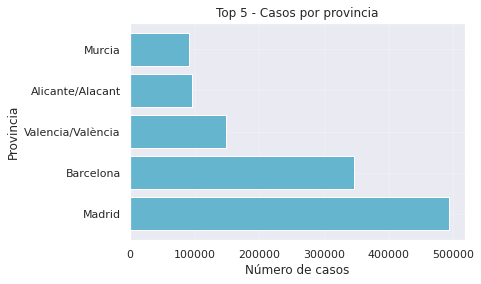

In [249]:
# Creacción del gráfico de barras horizontales
x = agrupar.index
y = agrupar["num_casos"]
plt.barh(x,y, color="c")
plt.title("Top 5 - Casos por provincia")
plt.xlabel("Número de casos")
plt.ylabel("Provincia")

# alpha sirve para poner mayor transparencia o menor al grid 1-> opaco 0-> transparente
plt.grid(True, alpha=0.2)
plt.show()

## Gráfico que muestre un diagrama de dispersión entre dos variables - SEABORN

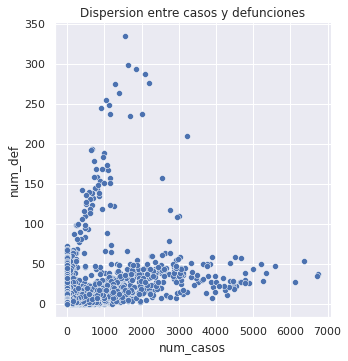

In [270]:
# Para no usar la misma notación de definir x = lo que sea e y = lo que sea y pintar el grafico, voy a usar esta otra forma que permite SEABORN

grafico = sns.relplot(x="num_casos", y="num_def", data = preparados)
grafico.set(title="Dispersion entre casos y defunciones")
plt.show()

## Gráfico de tarta que muestre el total por sexos - MATPLOTLIB

In [271]:
# Modifico el dataframe
# Primero agrupo por provincias haciendo sum()
ccaa = preparados.groupby(["ccaa"]).sum()

# Ordeno de mayor a menor el numero de casos que hemos agrupado por provincia
ccaa = ccaa.sort_values(["num_casos"],ascending=False)

# Me quedo con los top 5 de arriba
ccaa = ccaa.head(10)
ccaa

,num_casos,num_def,poblacion,hospitalized
ccaa,,,,
Comunidad de Madrid,493480.0,18530.0,5443992898,1552252.0
Cataluña,467867.0,18877.0,7191678329,995725.0
Andalucía,363280.0,13318.0,7412945440,716886.0
Comunidad Valenciana,269802.0,9131.0,4633490094,425024.0
Castilla y León,168314.0,8321.0,2385150712,438906.0
Castilla - La Mancha,139550.0,7078.0,1849905330,226089.0
País Vasco,128175.0,6024.0,2190113792,167051.0
Aragón,92786.0,4656.0,1257284323,272628.0
Región de Murcia,90861.0,2218.0,1359447180,141243.0


In [272]:
#tarta = pygal.Pie()
#tarta.title = "Top 10 - Comunidades autónomas con más casos"
#for i in range(len(ccaa)):
 #   tarta.add(ccaa.index[i],ccaa["num_casos"][0])
#tarta

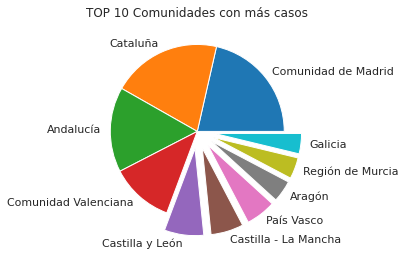

In [273]:
# Definimos una lista con los colores de cada area/parte del grafico
colores_areas = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Separacion para que no este cada porcion tan junta, donde son mas pequeñas
separacion = [0,0,0,0,0.2,0.2,0.2,0.2,0.2,0.2]
# Los datos son "num_casos" y las labels la comunidad autónoma
plt.pie(ccaa["num_casos"], labels = ccaa.index, colors=colores_areas, explode=separacion)
plt.title("TOP 10 Comunidades con más casos")
plt.show()

## Gráfico de tipo TreeMap - PyGal

In [274]:
treemap = pygal.Treemap()
treemap.title = "Treemap Casos Comunidad y Provincias"

# Agrupamos por comunidads autonomas, y dentro de esto, con una función lambda, agrupo el valor= numero de casos y el label el nombre de la provincia
ca_prov = preparados.groupby(['ccaa'], axis=0).apply(lambda x : [{"value" : l, "label" : c } for l, c in zip(x['num_casos'], x['province'])])
ca_prov

ccaa
Andalucía                     [{'value': 0.0, 'label': 'Almería'}, {'value':...
Aragón                        [{'value': 0.0, 'label': 'Huesca'}, {'value': ...
Canarias                      [{'value': 0.0, 'label': 'Palmas, Las'}, {'val...
Cantabria                     [{'value': 0.0, 'label': 'Cantabria'}, {'value...
Castilla - La Mancha          [{'value': 0.0, 'label': 'Albacete'}, {'value'...
Castilla y León               [{'value': 0.0, 'label': 'Ávila'}, {'value': 0...
Cataluña                      [{'value': 2.0, 'label': 'Barcelona'}, {'value...
Ceuta                         [{'value': 1.0, 'label': 'Ceuta'}, {'value': 0...
Comunidad Foral de Navarra    [{'value': 0.0, 'label': 'Navarra'}, {'value':...
Comunidad Valenciana          [{'value': 1.0, 'label': 'Alicante/Alacant'}, ...
Comunidad de Madrid           [{'value': 3.0, 'label': 'Madrid'}, {'value': ...
Extremadura                   [{'value': 0.0, 'label': 'Badajoz'}, {'value':...
Galicia                       [{'va

In [275]:
# Aqui vamos a introducir los datos como nos interesan para la representacion
nuevos = {}

# Pasamos lo obtenido en la celda anterior a un diccionario
datos= ca_prov.to_dict()

# Recorremos las claves --> comunidades autónomas
for key in datos.keys():
    
    casos = []
    provincias = []
    ccaa = []
    
    # Recorremos los arrays de cada comunidad autónoma
    for item in datos[key]:
        
        # Si la provincia no se ha añadido metemos el numero de casos y el nombre de la provincia
        if item['label'] not in provincias:
            provincias.append(item['label'])
            casos.append(item['value'])
        
        # Si ya se ha añadido obtenemos el indice y sumamos los casos
        else:
            i = provincias.index(item['label'])
            casos[i] += item['value']
    
    for p,c in zip(provincias, casos):
        ccaa.append({'value':c,'label':p})
    nuevos[key] = ccaa
    
# Ahora cogemos el diccionario que tenemos y lo pasamos a un Pandas para poderlo representar
datosrepresentar = pd.Series(nuevos)

# Impresion de los datos
datosrepresentar

Andalucía                     [{'value': 32810.0, 'label': 'Almería'}, {'val...
Aragón                        [{'value': 14862.0, 'label': 'Huesca'}, {'valu...
Canarias                      [{'value': 17267.0, 'label': 'Palmas, Las'}, {...
Cantabria                            [{'value': 21694.0, 'label': 'Cantabria'}]
Castilla - La Mancha          [{'value': 22129.0, 'label': 'Albacete'}, {'va...
Castilla y León               [{'value': 9576.0, 'label': 'Ávila'}, {'value'...
Cataluña                      [{'value': 346896.0, 'label': 'Barcelona'}, {'...
Ceuta                                     [{'value': 3758.0, 'label': 'Ceuta'}]
Comunidad Foral de Navarra             [{'value': 47106.0, 'label': 'Navarra'}]
Comunidad Valenciana          [{'value': 95133.0, 'label': 'Alicante/Alacant...
Comunidad de Madrid                    [{'value': 493480.0, 'label': 'Madrid'}]
Extremadura                   [{'value': 39881.0, 'label': 'Badajoz'}, {'val...
Galicia                       [{'value':

In [276]:
# Creaccion del treemap con pygal
treemap = pygal.Treemap()

# Introducción de los datos en el treemap que hemos creado arriba
[treemap.add(x[0], x[1][:10]) for x in datosrepresentar.iteritems()]

In [277]:
# Despliege en el buscador
treemap.render_in_browser()

file:///tmp/tmpgodg1abe.html


## Gráficos a elección del alumno

#### Voy a realizar un gráfico con Seaborn y otro con PyGal ya que son las librerías que menos he utilizado para la realización de las gráficas obligatorias

### Media del número de casos por Comunidad Autónoma - PyGal - Gráfico de barras

In [258]:
# Agrupamos por comunidad autonoma la media de casos covid
media_casos = preparados.groupby("ccaa")["num_casos"].mean()
media_casos.head(10)

ccaa
Andalucía                      51.543700
Aragón                         32.454005
Canarias                       19.974939
Cantabria                      26.456098
Castilla - La Mancha           30.670330
Castilla y León                18.814442
Cataluña                      124.831110
Ceuta                           3.968321
Comunidad Foral de Navarra     49.742344
Comunidad Valenciana           97.120950
Name: num_casos, dtype: float64

In [259]:
# Creaccion del treemap con pygal
barras = pygal.Bar(height=420, width=1200)

# De forma similar al treemap de arriba introducimos los datos
[barras.add(bar[0],bar[1]) for bar in media_casos.items()]

In [260]:
# Despliege en el buscador
barras.render_in_browser()

file:///tmp/tmp0ot0t0ui.html


### Suma total de hospitalizados por Provincia - Seaborn - Gráfico de barras horizontales

In [284]:
# Agrupamos por comunidad autónoma la suma de casos hospitalizados de covid
sum_hosp = preparados.groupby("ccaa")["hospitalized"].sum()
sum_hosp.head(10)

ccaa
Andalucía                     716886.0
Aragón                        272628.0
Canarias                      196286.0
Cantabria                      62825.0
Castilla - La Mancha          226089.0
Castilla y León               438906.0
Cataluña                      995725.0
Ceuta                           6337.0
Comunidad Foral de Navarra     55363.0
Comunidad Valenciana          425024.0
Name: hospitalized, dtype: float64

In [285]:
# Defino los arrays que voy a utilizar para guardar los datos
ccaa = []
hospitalizados = []

# Recorro el pandas anterior creado y voy guardando en el array correspondiente
for datos in sum_hosp.items():
    ccaa.append(datos[0])
    hospitalizados.append(datos[1])

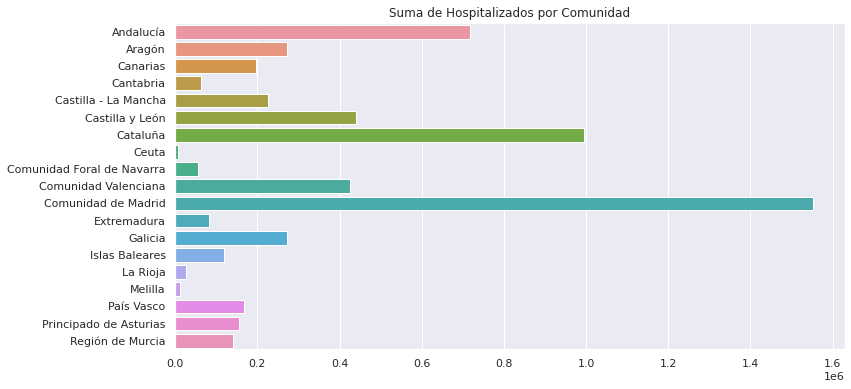

In [296]:
from matplotlib import rcParams

barh = sns.barplot(x=hospitalizados,y=ccaa)
barh.set(title="Suma de Hospitalizados por Comunidad")
rcParams['figure.figsize'] = 12,6

plt.show()